###  - Objectives
Predict the house price given vairous features of dataset.

### - Subgoals
- Exploratory data analysis (EDA)/ Preprocessing
. Histogram  
. Normality/Skewness  
. Missing values  
. Correlations among features  
. Outliers  
- Feature Selection (for predictors)  
. correlation matrix  
. K-best  
. ANOVA test for categorical features  
- Modeling  
. regularized regressoin - LASSO, ElasticNet  
. XGBoost Regression  
- Others  
. categorical predictor by one-hot encoding  


### - References
-  feature selection: http://scikit-learn.org/stable/modules/feature_selection.html
- https://www.kaggle.com/dansbecker/learning-to-use-xgboost
- https://www.kaggle.com/apapiu/regularized-linear-models
      

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import norm
%matplotlib inline

In [2]:
# import data
df = pd.read_csv('./train.csv')

## 1. EDA


** a. Histogram **
check out histogram for some features

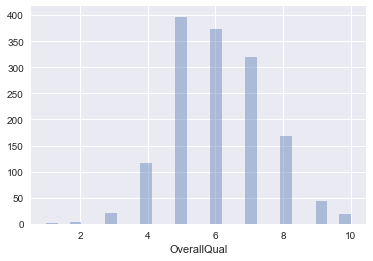

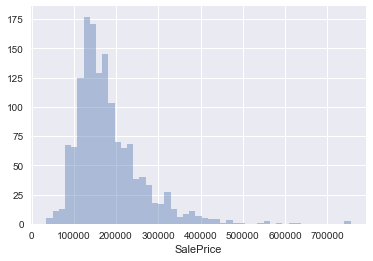

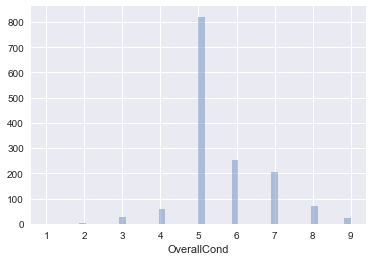

In [3]:
#histogram
plt.figure(); sns.distplot(df['OverallQual'],kde=False)
plt.figure(); sns.distplot(df['SalePrice'],kde=False)
plt.figure(); sns.distplot(df['OverallCond'],kde=False)

** b. Normality Check **

In [4]:
# - check with skewness and kurtosi
print("\n- Skewness of SalePrice histogram: %f" % df['SalePrice'].skew())
print("\n- Kurtosis of SalePrice histogram: %f" % df['SalePrice'].kurt())


- Skewness of SalePrice histogram: 1.882876

- Kurtosis of SalePrice histogram: 6.536282


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.164745194154, 180921.19589041095, 0.93196656415129864))

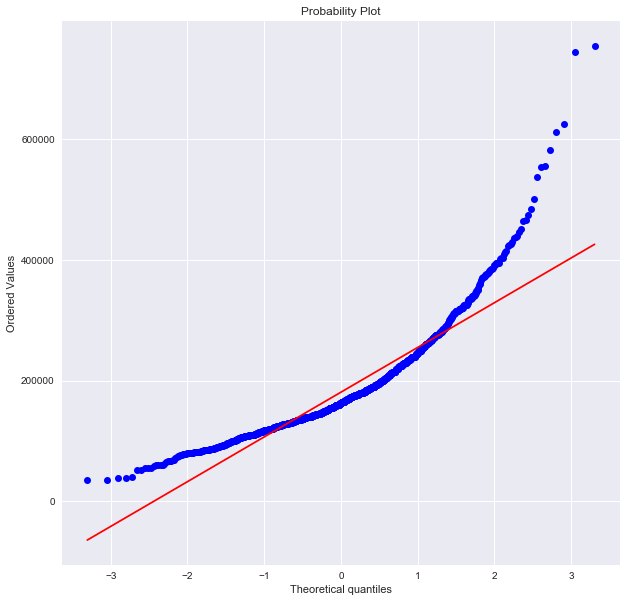

In [5]:
# - check with Q-Q Plot
plt.figure(figsize=(10,10)); stats.probplot(df['SalePrice'], plot=plt)

you can simply normalized by taking a logarithm. check out Q-Q plot for normality

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.34550693,
          13.5211395 ,  13.53447303])),
 (0.39826223081618878, 12.024050901109383, 0.99537614756366133))

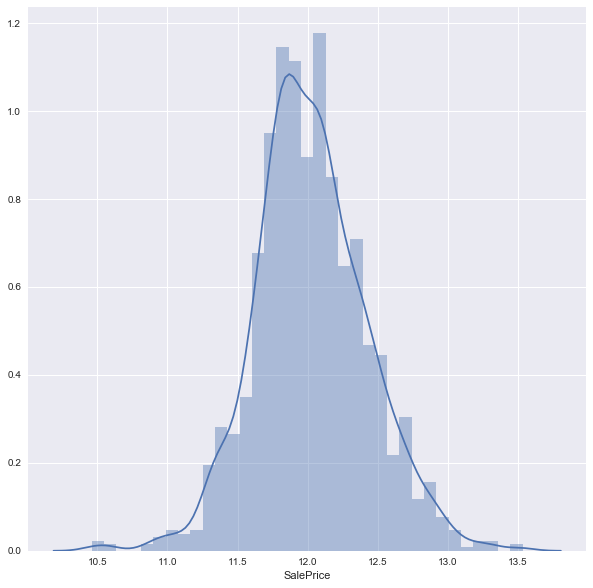

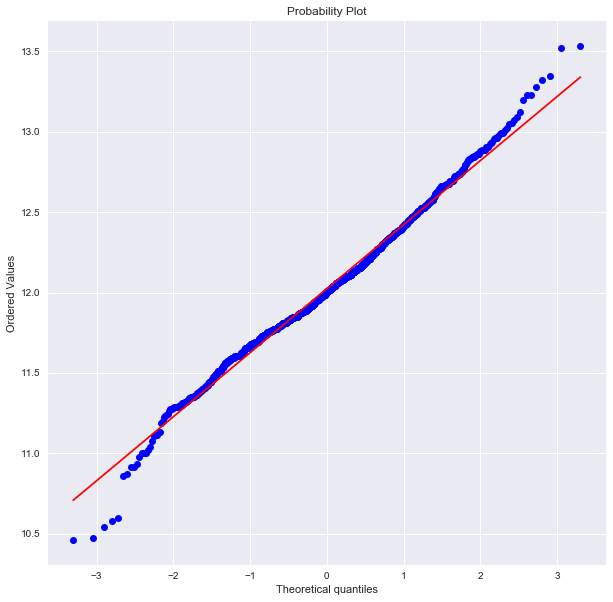

In [6]:
# - normalize
plt.figure(figsize=(10,10)); sns.distplot(np.log(df['SalePrice']),kde=True)
plt.figure(figsize=(10,10)); stats.probplot(np.log(df['SalePrice']), plot=plt)

as the 'OverallQual(categorical value)' seems to be the easiest guess for the predictor for 'SalePrice', we can check the relation between them by boxplot. you can see the price gets higer with better overall quality.

** c. Correlations **

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


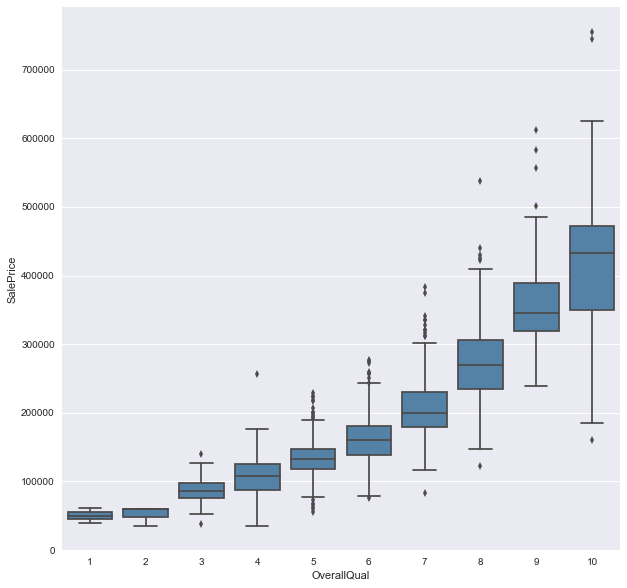

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(df['OverallQual'], df['SalePrice'], color = 'steelblue')
plt.legend(); plt.xlabel('OverallQual'); plt.ylabel('SalePrice')

we can check the relations between some features to price as belows. 

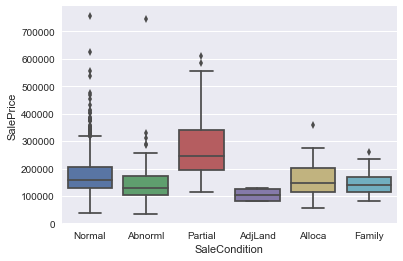

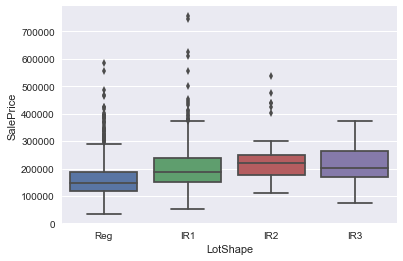

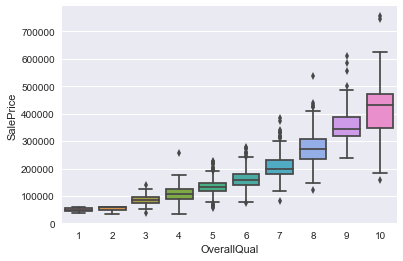

In [8]:
plt.figure(); sns.boxplot(df['SaleCondition'], df['SalePrice'])
plt.figure(); sns.boxplot(df['LotShape'], df['SalePrice'])
plt.figure(); sns.boxplot(df['OverallQual'], df['SalePrice'])

** d. Missing Values **

In [9]:
print("\n - Missinv Value portion: \n", (df.isnull().sum()/len(df)).sort_values(ascending=False))


 - Missinv Value portion: 
 PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
BsmtUnfSF        0.000000
ScreenPor

Dealing with missing values: take out features with too many missing values, and fill mean values for rest of NaNs.

In [10]:
# Take out columns with too many NaNs
col_nan=(df.isnull().sum()/len(df)).sort_values(ascending=False)[:7].index
df = df.drop(col_nan, axis=1)

# replace with mean of each column for the rest of the features
df = df.fillna(df.mean())


## 2.  Feature Selection

** a. Correlation Matrix **  
-  high correlation among predictors --> room for feature reduction 
- high correlation between predictors and dependant variable --> important feature 

In [11]:
""" (1) feature select by correlation matrix """
# - the function automatically only applies for numerical data
corr_matrix = df.corr()
# print (corr_matrix)

# narrow down features to most correlated features with 'SalePrice' 
print ("- Correlation Matrix:\n", corr_matrix['SalePrice'])
print ("\n- Most relavant features by correlation matrix:\n",
       corr_matrix['SalePrice'].nlargest(11).index)

- Correlation Matrix:
 Id              -0.021917
MSSubClass      -0.084284
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.470177
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice

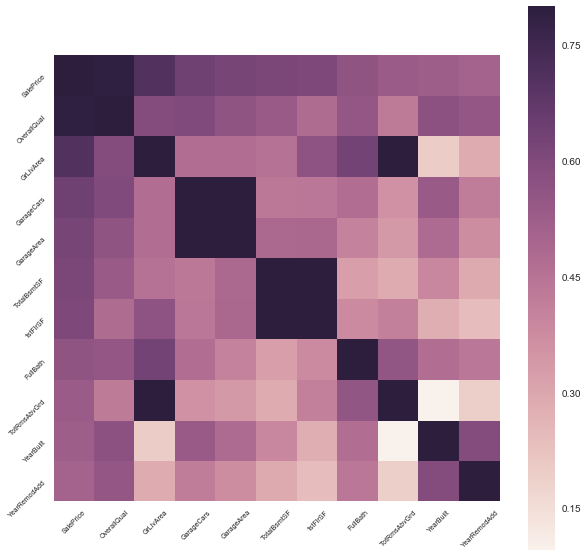

In [12]:
# narrow down features to most correlated features with 'SalePrice' 
new_corr = df[corr_matrix['SalePrice'].nlargest(11).index].corr()

# check with heatmap w/ new corr matrix
plt.figure(figsize=(10,10))
sns.heatmap(new_corr, vmax=0.8, square=True)
plt.xticks(rotation=45, fontsize= 7);plt.yticks(rotation=45, fontsize= 7);
# plt.legend(); plt.xlabel(''); plt.ylabel('')
# plt.savefig('./figures/heatmap.png'); plt.close(

** b. K-Best **  
reference: http://scikit-learn.org/stable/modules/feature_selection.html 

In [13]:
""" (2) feature select by K-Best """
# split categorical data and numerical data
num_df = df.select_dtypes(include=[np.number])
cat_df = df.select_dtypes(exclude=[np.number])
print("\n- among total number of features (%d), "
      "\n-numerical features: %d \n-categorical features: %d"
      % (len(df.columns), len(num_df.columns), len(cat_df.columns)) )

# K-Best
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
predictors = num_df.columns[:-1] # collect all features w/o target feature
selection = SelectKBest(f_regression, k=5).fit(df[predictors], df['SalePrice'])
# selection = SelectKBest(mutual_info_regression,k=5).fit(df[predictors], df['SalePrice'])

scores = -np.log(selection.pvalues_)# scores = selection.scores_


- among total number of features (74), 
-numerical features: 37 
-categorical features: 37


- Most relavant features by selectKbest(sklearn): 
 Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')


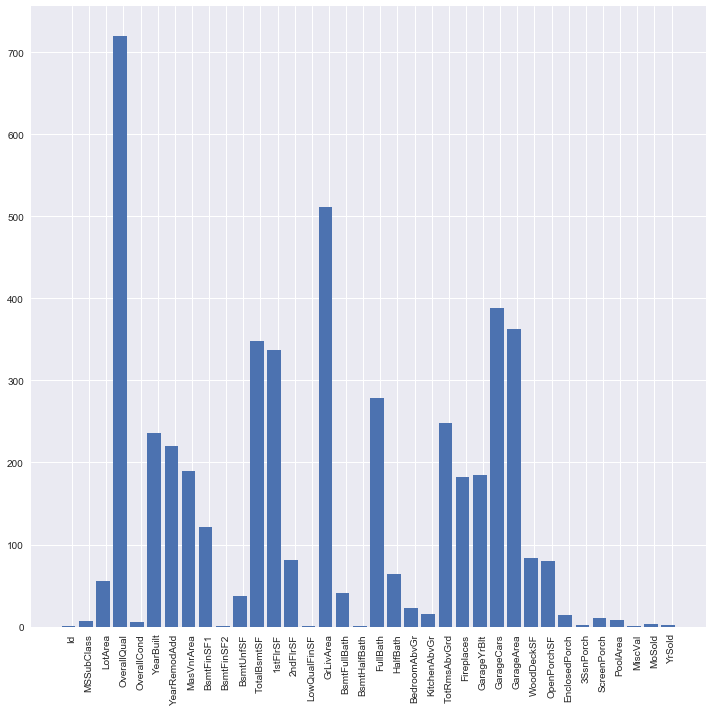

In [14]:
plt.figure(figsize=(10,10))
plt.bar(range(len(scores)), scores)
plt.xticks(np.arange(.2, len(scores)+.2), predictors, rotation="vertical")
plt.tight_layout()

# use top 10 most relavant features
scores_sr = pd.Series(scores,index=predictors)
selected_features = scores_sr.nlargest(10)
print ("- Most relavant features by selectKbest(sklearn): \n", selected_features.index)

** c. ANOVA test for "CATEGORICAL data" **  
- The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean.
- The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.  
    . The samples are independent.  
    . Each sample is from a normally distributed population.  
    . The population standard deviations of the groups are all equal. This property is known as homoscedasticity.  
    
// reference: https://www.kaggle.com/tamatoa/house-prices-predicting-sales-price 

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/scipy/stats/stats.py:2958: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


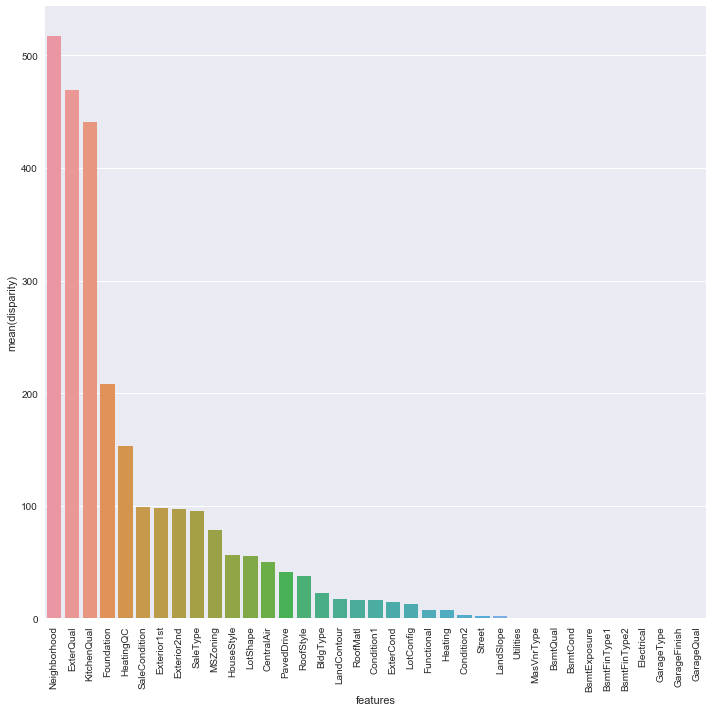

In [15]:
col_cat=list(cat_df.columns)
#print(cat)
def anova_test(inDF):
    anv = pd.DataFrame()
    anv['features'] = col_cat
    pvals=[]
    for c in col_cat:
        samples=[]
        for cls in inDF[c].unique():
            s=inDF[inDF[c]==cls]['SalePrice'].values
            samples.append(s)
        pval=stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv["pval"]=pvals
    return anv.sort_values("pval")

cat_df['SalePrice']=df.SalePrice.values
k=anova_test(cat_df)
k['disparity']=np.log(1./k['pval'].values)

plt.figure(figsize=(10,10))
sns.barplot(data=k,x="features",y="disparity")
plt.xticks(rotation=90); plt.tight_layout()


## 3. Modeling / Regularized Regression & XGBoost Regression

** a. Preprocessing**
- normalize skewed data --> *** note that log1p is used otherwise it will result in "infinite" in the table***
- deal with missing values
- deal with outliers


In [16]:
# unskew all data
print(num_df.skew())
skewed_features = num_df.columns[num_df.skew()>0.75]

# *** note that np.log1p() is used, not np.log() ***
# if np.log() is used, the dataframe is filled with -inf
# http://rfriend.tistory.com/295
num_df_norm = np.log1p(num_df[skewed_features]) 

Id                0.000000
MSSubClass        1.407657
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

Split predictors(X_train) & dependant variable (y; SalePrice)

In [17]:
X_train  = num_df_norm.drop('SalePrice', axis=1)
y = num_df_norm['SalePrice']

** a. LASSO regressoin **  

note that R^2 score is used as evaluation matrix. If we splited data for test set, RMSE can be used.

In [18]:
""" (1)-a Regularized Regression : LASSO """
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, LassoCV
from sklearn.model_selection import cross_val_score

model_lasso = LassoCV(cv=20).fit(X_train, y)
print("LASSO/alpha: ",model_lasso.alpha_)
print("LASSO/Coef: ",model_lasso.coef_)
print("LASSO/R^2 Score: ",model_lasso.score(X_train,y))

LASSO/alpha:  0.000441380629663
LASSO/Coef:  [ 0.02133863  0.06319689  0.01107165  0.01133217 -0.01055398 -0.00459845
  0.03339088 -0.14267849 -0.04117765 -0.05167887  1.02319654 -0.03696758
 -0.67642781  0.016846    0.02119312 -0.01589131  0.0071636   0.00587626
 -0.01605986 -0.00734329]
LASSO/R^2 Score:  0.746881679139


** b. ElasticNet ** 

In [19]:
""" (1)-b Regularized Regression : Elastic Net """
model_elastic = ElasticNetCV(cv=20,random_state=0).fit(X_train,y)
print("ElasticNet/alpha: ",model_elastic.alpha_)
print("ElasticNet/Coef: ",model_elastic.coef_)
print("ElasticNet/R^2 Score: ",model_elastic.score(X_train,y))

ElasticNet/alpha:  0.000882761259325
ElasticNet/Coef:  [ 0.01897788  0.06288092  0.01173252  0.01134066 -0.0105054  -0.00453945
  0.03448621 -0.07296666 -0.03380719 -0.04787024  0.93591079 -0.03637207
 -0.62223445  0.01718832  0.02206114 -0.01598137  0.00742926  0.00610746
 -0.01617787 -0.00747223]
ElasticNet/R^2 Score:  0.745316818387


** c. XGBoost**  
note that thise time test set (with SalePrice known) is prepared and the RMSE is also used for evaluation matrix.

In [20]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('./train.csv')

# handling with NaNs
df = df.dropna(axis=0, subset=['SalePrice'])
col_nan=(df.isnull().sum()/len(df)).sort_values(ascending=False)[:7].index
df = df.drop(col_nan, axis=1)
df = df.fillna(df.mean())

X = df.select_dtypes(include=[np.number]).drop(['SalePrice'],axis=1).fillna(df.mean())
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

from xgboost import XGBRegressor
model_XGboost = XGBRegressor().fit(X_train, y_train, verbose=False)

"""Evaluation"""
# a. Mean Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_predict = model_XGboost.predict(X_test)

# print ("-MAE: ", mean_absolute_error(y_test, y_predict))
print ("- RMSE: ", np.sqrt(mean_squared_error(y_test,y_predict)) )

# (2) r^2
from sklearn.metrics import r2_score
print("- r^2:", r2_score(y_test,y_predict))

- RMSE:  24409.663651
- r^2: 0.902119847595


/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
""" tuning more parameters"""
model_XGboost_tuned = XGBRegressor(n_estimators=1000, learning_rate=0.01)\
    .fit(X_train, y_train, early_stopping_rounds=10,
         eval_set=[(X_test,y_test)],verbose=False)

y_predict_tuned = model_XGboost_tuned.predict(X_test)
print ("- RMSE/tuned model: ", np.sqrt(mean_squared_error(y_test,y_predict_tuned)))
print("- r^2/tuned model:", r2_score(y_test,y_predict_tuned))

- RMSE/tuned model:  24818.2191403
- r^2/tuned model: 0.898815899208


** // End of the document ** 